In [4]:
import os
import pandas as pd
import nltk
import numpy as np
import sklearn
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from wordcloud import WordCloud
import time

In [5]:
data = pd.read_csv("data bocor-new1.csv") 
data.head()

,time,id,username,text
0,2021-11-21 23:56:14+00:00,1462570580775821313,BukanBuTejo,b'@txtdaritekno Gak usah sok keren data bocor ...
1,2021-11-21 16:35:53+00:00,1462459765494214661,Syan~GA ALBUM~CEK PINNED,b'@ameamakunai Bisa aja email kak ame bocor tr...
2,2021-11-21 14:52:08+00:00,1462433655008030720,Ivoox Indonesia,b'Data yang Bocor Berpotensi Disalahgunakan Pe...
3,2021-11-21 14:41:13+00:00,1462430907277529095,🦈 SUROBOYOFESS 🐊,b'Kok data lu bocor yaa?? Hmm isok ae lak mbuj...
4,2021-11-21 11:44:12+00:00,1462386359386222594,Aktual Official,b'CISSReC Sebut Data Pribadi Bocor Bisa Diguna...


In [6]:
#pelabelan dengan textblob

# Casefolding

def text_blop(txt):
    clean = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",txt).split())
    text = TextBlob(clean)
    
    try:
      text = text.translate(to="en")
      time.sleep(1)
    except Exception as e:
      print(e)

    if text.sentiment.polarity > 0.0:
      hasil = "Positif"
    
    elif text.sentiment.polarity == 0.0:
      hasil = "Netral"

    else:
      hasil = "Negatif"

    return hasil

data['label'] = data['text'].apply(lambda x: text_blop(x))
data.head()  

Translation API returned the input string unchanged.
Translation API returned the input string unchanged.
Translation API returned the input string unchanged.
Translation API returned the input string unchanged.
Translation API returned the input string unchanged.
Translation API returned the input string unchanged.
Translation API returned the input string unchanged.


,time,id,username,text,label
0,2021-11-21 23:56:14+00:00,1462570580775821313,BukanBuTejo,b'@txtdaritekno Gak usah sok keren data bocor ...,Positif
1,2021-11-21 16:35:53+00:00,1462459765494214661,Syan~GA ALBUM~CEK PINNED,b'@ameamakunai Bisa aja email kak ame bocor tr...,Positif
2,2021-11-21 14:52:08+00:00,1462433655008030720,Ivoox Indonesia,b'Data yang Bocor Berpotensi Disalahgunakan Pe...,Netral
3,2021-11-21 14:41:13+00:00,1462430907277529095,🦈 SUROBOYOFESS 🐊,b'Kok data lu bocor yaa?? Hmm isok ae lak mbuj...,Netral
4,2021-11-21 11:44:12+00:00,1462386359386222594,Aktual Official,b'CISSReC Sebut Data Pribadi Bocor Bisa Diguna...,Netral


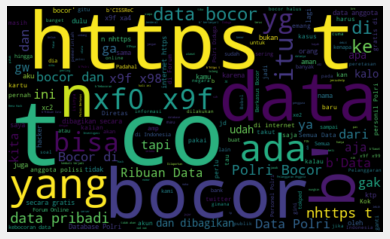

In [4]:
#plot the word cloud

allwords = ' '.join([twts for twts in data['text']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allwords)


plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [7]:
j = 1
sortedDF = data.sort_values(by=['label'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['label'][i] == 'Positif'):
    print(str(j) + ') '+sortedDF['text'][i])
    print()
    j = j+1

1) b'@txtdaritekno Gak usah sok keren data bocor di darkweb, karena warga negara udah sering kebocoran data ktp &amp; KK di bungkus kacang &amp; gorengan \xf0\x9f\x98\x82'

2) b'@ameamakunai Bisa aja email kak ame bocor trus ada nomornya yang nyambung(?) ke emailnya. Mending cari di getcontact trus di-block kak kalo ngga kenal. Soalnya belum ada cara buat ngatasin data bocor'

3) b'@jeniushelp @yosimadsu Nasabah terpedaya karena data bocor halus, kirain bank beneran terpercaya ternyata cuma bisa ngeles, jebakan betmen'

4) b'Banyak banget lho risiko dari data pribadi yang bocor. Makanya Sobat Keva harus hati-hati jaga data pribadi, jangan sampai data diri sampai di tangan yang tidak bertanggung jawab.\n\n#yukevaid #digitalfuture #fakta #faktakeva #faktaunik #peretasan #hacker #datapribadi #illegal'

5) b'CISSReC: Teroris Pakai Data WNI yang Bocor untuk Rekrut Anggota Baru https://t.co/mbNOaQvx3v https://t.co/Z7v26Avonj'

6) b'@bertanyarl gini ya, tiap kalian pasang app baru dihp pasti 

In [8]:
j = 1
sortedDF = data.sort_values(by=['label'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['label'][i] == 'Negatif'):
    print(str(j) + ') '+sortedDF['text'][i])
    print()
    j = j+1

1) b'Gilaa ada yang ngaku pinjol nelp ke mutual twitter gw yang sama sekali gw gakpunya nomernya. Tapi dia tau nama lengkap gue dan alamat. Serem banget apalagi pas cek nomernya di Getcontact. Dari mana yaa taunya? Masa data gw bocor? https://t.co/7mIAMdZptM'

2) b'Data Pribadi Bocor, Lembaga BersangkutanHarus Ditindak Tegas https://t.co/nlQ4LXODRN'

3) b'Kalau Jendralnya jendral Meja, ya begini..anak buah keburu mati, dianya masih mikirin strategi, mati semua, baru giliran jendralnya yg di buru, mau Prof..\n\nData CIA bocor, Densus yg ngamuk. https://t.co/t2sBC40Ktz'

4) b'Data Polri Diduga Bocor, Pakar Nilai Perlu Investigasi Serius https://t.co/Cid4K2ua1P'

5) b'serem banget data anak kampus bocor semua'

6) b"@kontakBRI So...what's the answer?\nBisakahyg  diperkuat itu firewallnya, bukan ganti PIN melulu. PIN itu tidak akan bocor jika tidak kami yg bocorkan atau pihak bank yg membuka data nasabah! Bosen ganti pin terus sampe lupa"

7) b'Ko skrg aku serinh nemu loker yg isi form ter

In [9]:
j = 1
sortedDF = data.sort_values(by=['label'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['label'][i] == 'Netral'):
    print(str(j) + ') '+sortedDF['text'][i])
    print()
    j = j+1

1) b'Data yang Bocor Berpotensi Disalahgunakan Pelaku Terorisme https://t.co/89OI5jwAyX'

2) b'Kok data lu bocor yaa?? Hmm isok ae lak mbujuki -rek https://t.co/kaxaeuCZAb'

3) b'CISSReC Sebut Data Pribadi Bocor Bisa Digunakan\xc2\xa0Teroris https://t.co/jFvxMfEYlH'

4) b'Data bocor dapat digunakan oleh pelaku terorisme\n\nhttps://t.co/PIZ2VZRvK7'

5) b'@isekaiu Lagi perbaikan kali bok gara2 data ktp bocor'

6) b'Data Bocor Bisa Digunakan Oleh Pelaku\xc2\xa0Terorisme https://t.co/nm0MLlWvDj'

7) b'@bertanyarl Buat temen2 pengguna smartphone, gak usah takut data kita bocor, ya karena emang udah bocor.'

8) b'@ariemay15 @nisa_rah @JeniusConnect @jeniushelp Algoritma apa, bisa jelasin dg sederhana?\n\nSesuatu yang begitu sederhana mengenai data bocor halus kok malah dibikin rumit pakai bahasa algoritma.\n\nVictim blaming, denying the victim dan playing victim itu 3 serangkai lingkaran setan. Orang awam pun paham, yang penting jujur.'

9) b'Mantan Kabais: Perlu ada aturan sanksi bagi insti

In [10]:
ptweets = data[data.label == 'Positif']
ptweets = ptweets['text']

round((ptweets.shape[0] / data.shape[0]) * 100, 1)

37.8

In [11]:
ptweets = data[data.label == 'Negatif']
ptweets = ptweets['text']

round((ptweets.shape[0] / data.shape[0]) * 100, 1)

20.6

In [12]:
ptweets = data[data.label == 'Netral']
ptweets = ptweets['text']

round((ptweets.shape[0] / data.shape[0]) * 100, 1)

41.6

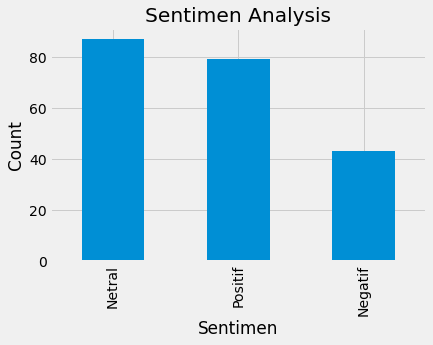

In [13]:
data['label'].value_counts()

plt.title('Sentimen Analysis')
plt.xlabel('Sentimen')
plt.ylabel('Count')
data['label'].value_counts().plot(kind='bar')
plt.show()

In [14]:
# Casefolding

def casefolding(txt):
    text = str(txt).lower()
    return text

data['text'] = data['text'].apply(lambda x: casefolding(x))
data.head()

,time,id,username,text,label
0,2021-11-21 23:56:14+00:00,1462570580775821313,BukanBuTejo,b'@txtdaritekno gak usah sok keren data bocor ...,Positif
1,2021-11-21 16:35:53+00:00,1462459765494214661,Syan~GA ALBUM~CEK PINNED,b'@ameamakunai bisa aja email kak ame bocor tr...,Positif
2,2021-11-21 14:52:08+00:00,1462433655008030720,Ivoox Indonesia,b'data yang bocor berpotensi disalahgunakan pe...,Netral
3,2021-11-21 14:41:13+00:00,1462430907277529095,🦈 SUROBOYOFESS 🐊,b'kok data lu bocor yaa?? hmm isok ae lak mbuj...,Netral
4,2021-11-21 11:44:12+00:00,1462386359386222594,Aktual Official,b'cissrec sebut data pribadi bocor bisa diguna...,Netral


In [15]:
import string
import re
string.punctuation

def remove_punctuation(txt):
    '''a function for removing punctuation'''
    text = re.sub('\[.*?\]', '', str(txt))
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

data['clean'] = data['text'].apply(lambda x: remove_punctuation(x))
data.head()

,time,id,username,text,label,clean
0,2021-11-21 23:56:14+00:00,1462570580775821313,BukanBuTejo,b'@txtdaritekno gak usah sok keren data bocor ...,Positif,btxtdaritekno gak usah sok keren data bocor di...
1,2021-11-21 16:35:53+00:00,1462459765494214661,Syan~GA ALBUM~CEK PINNED,b'@ameamakunai bisa aja email kak ame bocor tr...,Positif,bameamakunai bisa aja email kak ame bocor trus...
2,2021-11-21 14:52:08+00:00,1462433655008030720,Ivoox Indonesia,b'data yang bocor berpotensi disalahgunakan pe...,Netral,bdata yang bocor berpotensi disalahgunakan pel...
3,2021-11-21 14:41:13+00:00,1462430907277529095,🦈 SUROBOYOFESS 🐊,b'kok data lu bocor yaa?? hmm isok ae lak mbuj...,Netral,bkok data lu bocor yaa hmm isok ae lak mbujuki...
4,2021-11-21 11:44:12+00:00,1462386359386222594,Aktual Official,b'cissrec sebut data pribadi bocor bisa diguna...,Netral,bcissrec sebut data pribadi bocor bisa httpst...


In [16]:
# Stemming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(txt):
    words=stemmer.stem(txt)
    return words

data['stemming']=data['clean'].apply(lambda x: stemming(x))
data.head()

,time,id,username,text,label,clean,stemming
0,2021-11-21 23:56:14+00:00,1462570580775821313,BukanBuTejo,b'@txtdaritekno gak usah sok keren data bocor ...,Positif,btxtdaritekno gak usah sok keren data bocor di...,btxtdaritekno gak usah sok keren data bocor di...
1,2021-11-21 16:35:53+00:00,1462459765494214661,Syan~GA ALBUM~CEK PINNED,b'@ameamakunai bisa aja email kak ame bocor tr...,Positif,bameamakunai bisa aja email kak ame bocor trus...,bameamakunai bisa aja email kak ame bocor trus...
2,2021-11-21 14:52:08+00:00,1462433655008030720,Ivoox Indonesia,b'data yang bocor berpotensi disalahgunakan pe...,Netral,bdata yang bocor berpotensi disalahgunakan pel...,bdata yang bocor potensi disalahgunakan laku t...
3,2021-11-21 14:41:13+00:00,1462430907277529095,🦈 SUROBOYOFESS 🐊,b'kok data lu bocor yaa?? hmm isok ae lak mbuj...,Netral,bkok data lu bocor yaa hmm isok ae lak mbujuki...,bkok data lu bocor yaa hmm isok ae lak mbujuki...
4,2021-11-21 11:44:12+00:00,1462386359386222594,Aktual Official,b'cissrec sebut data pribadi bocor bisa diguna...,Netral,bcissrec sebut data pribadi bocor bisa httpst...,bcissrec sebut data pribadi bocor bisa httpstc...


In [17]:
# Filtering & Tokenizing

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

def filtering(txt):
    stop = stopword.remove(txt)
    tokens = nltk.tokenize.word_tokenize(stop)
    return tokens

data['filter'] = data['stemming'].apply(lambda x: filtering(x))
data.head()

,time,id,username,text,label,clean,stemming,filter
0,2021-11-21 23:56:14+00:00,1462570580775821313,BukanBuTejo,b'@txtdaritekno gak usah sok keren data bocor ...,Positif,btxtdaritekno gak usah sok keren data bocor di...,btxtdaritekno gak usah sok keren data bocor di...,"[btxtdaritekno, gak, usah, sok, keren, data, b..."
1,2021-11-21 16:35:53+00:00,1462459765494214661,Syan~GA ALBUM~CEK PINNED,b'@ameamakunai bisa aja email kak ame bocor tr...,Positif,bameamakunai bisa aja email kak ame bocor trus...,bameamakunai bisa aja email kak ame bocor trus...,"[bameamakunai, aja, email, kak, ame, bocor, tr..."
2,2021-11-21 14:52:08+00:00,1462433655008030720,Ivoox Indonesia,b'data yang bocor berpotensi disalahgunakan pe...,Netral,bdata yang bocor berpotensi disalahgunakan pel...,bdata yang bocor potensi disalahgunakan laku t...,"[bdata, bocor, potensi, disalahgunakan, laku, ..."
3,2021-11-21 14:41:13+00:00,1462430907277529095,🦈 SUROBOYOFESS 🐊,b'kok data lu bocor yaa?? hmm isok ae lak mbuj...,Netral,bkok data lu bocor yaa hmm isok ae lak mbujuki...,bkok data lu bocor yaa hmm isok ae lak mbujuki...,"[bkok, data, lu, bocor, yaa, hmm, isok, ae, la..."
4,2021-11-21 11:44:12+00:00,1462386359386222594,Aktual Official,b'cissrec sebut data pribadi bocor bisa diguna...,Netral,bcissrec sebut data pribadi bocor bisa httpst...,bcissrec sebut data pribadi bocor bisa httpstc...,"[bcissrec, sebut, data, pribadi, bocor, httpst..."


In [21]:
data['filter']=[" ".join(review) for review in data['filter'].values]

In [23]:
# # split data into sets
# train 80% test 20%

from sklearn import model_selection, svm
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(data['filter'],data['label'],test_size=0.2)

In [24]:
# # Encoding

from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [25]:
# Word Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(data['filter'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [26]:
print(Train_X_Tfidf)

  (0, 1261)	0.11943743605871905
  (0, 1238)	0.2343656476858147
  (0, 1133)	0.1769015418722669
  (0, 1088)	0.17201924774064273
  (0, 1076)	0.19638393972456014
  (0, 1074)	0.34403849548128546
  (0, 932)	0.2343656476858147
  (0, 739)	0.21755847416661567
  (0, 605)	0.2343656476858147
  (0, 453)	0.14565650198331143
  (0, 434)	0.2343656476858147
  (0, 348)	0.048772916671439605
  (0, 322)	0.21755847416661567
  (0, 303)	0.2343656476858147
  (0, 287)	0.17201924774064273
  (0, 229)	0.09163790233203706
  (0, 189)	0.16765188681778623
  (0, 182)	0.4112671895580816
  (0, 26)	0.29131300396662285
  (0, 23)	0.2343656476858147
  (1, 1052)	0.3187247835616277
  (1, 937)	0.25691976953390533
  (1, 931)	0.19939553532970608
  (1, 488)	0.3606330271689187
  (1, 349)	0.3306312153062292
  :	:
  (165, 876)	0.24887932831444437
  (165, 837)	0.2559430848421105
  (165, 620)	0.26395131150262524
  (165, 607)	0.2559430848421105
  (165, 453)	0.21073741952932135
  (165, 358)	0.2975129331146388
  (165, 348)	0.07056518907364

In [27]:
# Use SVM

from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score

In [28]:
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(Test_Y, predictions_SVM)
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
print(classification_report(Test_Y, predictions_SVM))

SVM Accuracy Score ->  47.61904761904761
              precision    recall  f1-score   support

           0       1.00      0.20      0.33        10
           1       0.37      0.71      0.49        14
           2       0.62      0.44      0.52        18

    accuracy                           0.48        42
   macro avg       0.66      0.45      0.45        42
weighted avg       0.63      0.48      0.46        42



In [30]:
from sklearn import model_selection, naive_bayes

# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score ->",accuracy_score(predictions_NB, Test_Y)*100)
print(classification_report(Test_Y, predictions_NB))

Naive Bayes Accuracy Score -> 50.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.40      1.00      0.57        14
           2       1.00      0.39      0.56        18

    accuracy                           0.50        42
   macro avg       0.47      0.46      0.38        42
weighted avg       0.56      0.50      0.43        42



C:\Users\ZENBOOK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
